<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_de_richardson_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = red>Método implícito de Richardson


##Use los tamaños de paso  $ h =0.1$ y $ k=0.01$ para aproximar la solucion de la ecuacion de calor

$$\frac{\partial U}{\partial t}(x,t) = \alpha^2 \frac{\partial U}{\partial t}(x,t), 0<x<1 y  0 \leq t $$

##con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t, $$

##y condiciones iniciales:

$$u(x,0) = sen(\pi x), 0\leq x \leq 1. $$




##La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j+1} - u_{i,j}}{k} = \alpha^2 \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}$$

##Reorganizando, se obtiene:

$$ (1 + 2r) u_{i,j} - r u_{i+1,j} - r u_{i-1,j} = u_{i,j-1}$$

##donde $r= \alpha^2 \frac{k}{h^2}$

Este método es implícito porque las incógnitas en el tiempo  $j+1$  ( $u_{i,j+1} $) están acopladas entre sí, formando un sistema de ecuaciones lineales que debe resolverse en cada paso de tiempo. Esto asegura estabilidad numérica incluso para pasos de tiempo relativamente grandes, como en este caso con  r  posiblemente mayor que 1/2. Las condiciones de frontera se incorporan directamente en el sistema, y la condición inicial establece los valores en  j=0

In [89]:
import sympy as sp #SymPy es una librería para matemáticas simbólicas. Permite trabajar con variables algebraicas, ecuaciones, derivadas, integrales, etc.,
import numpy as np #NumPy es la librería fundamental para cálculo numérico en Python. Proporciona arrays multidimensionales, funciones matemáticas, operaciones de álgebra lineal, etc.

import matplotlib.pyplot as plt # Matplotlib es la librería estándar para crear visualizaciones en 2D y 3D.
                                # pyplot es un módulo que ofrece una interfaz similar a MATLAB para generar gráficos.
from mpl_toolkits.mplot3d import Axes3D # Habilita la creación de gráficos tridimensionales (ejes 3D) en Matplotlib.
from matplotlib import cm #cm (colormaps) proporciona mapas de colores para visualizar datos en 2D/3D
                          #Útil para asignar colores a superficies según valores numéricos.


Definimos una función matemática simple que calcula el seno de π multiplicado por x:

In [90]:
def f(x): # es una declaración de función en Python
  return np.sin(np.pi*x)  # regresa el resultado del seno

Definimos una matriz tridiagonal de $9×9$, común en problemas numéricos como discretizaciones de ecuaciones diferenciales

In [91]:
A = sp.Matrix([[3,-1,0,0,0,0,0,0,0],
            [-1,3,-1,0,0,0,0,0,0],      #sp.Matrix es la clase constructora de matrices en SymPy
            [0,-1,3,-1,0,0,0,0,0],
            [0,0,-1,3,-1,0,0,0,0],
            [0,0,0,-1,3,-1,0,0,0],
            [0,0,0,0,-1,3,-1,0,0],
            [0,0,0,0,0,-1,3,-1,0],
            [0,0,0,0,0,0,-1,3,-1],
            [0,0,0,0,0,0,0,-1,3]])


##<font color = purple>Ejercicio 1:

##Codificar la matriz A de manera más simple.


Hacemos un Bucle que construye una matriz tridiagonal de $9×9$, común en problemas numéricos como discretizaciones de ecuaciones diferenciales

In [92]:


n = 9  # Número de puntos interiores

#Crea una matriz vacía de n x n
A_s = sp.zeros(n, n)

#Rellene la matriz con los elementos tridiagonales
for i in range(n):
    A_s[i, i] = 3  # Elementos diagonales
    if i > 0:
        A_s[i, i-1] = -1  # Elementos diagonales inferiores
    if i < n - 1:
        A_s[i, i+1] = -1  # Elementos diagonales superiores

Creamos un vector columna que evalúa la función $f(x)$ en puntos específicos

In [93]:
b = sp.Matrix([f(0.1),f(0.2),f(0.3),f(0.4),f(0.5),f(0.6),f(0.7),f(0.8),f(0.9)]) #Crear el vector b usando comprensión de lista

##<font color = purple>Ejercicio 2:

##*Definir* las entradas de b de manera más simple (quizás con un bucle).

Hacemos un bucle que crea un vector columna que evalúa la función $f(x)$ en puntos específicos

In [94]:

b_s = sp.Matrix([f(i * 0.1) for i in range(1, 10)])# Crear el vector b usando comprensión de lista

In [95]:
A #Llama a la Matriz A para mostrarla

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [96]:
A_s #Llama a la Matriz A_s para mostrarla

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [97]:
b #Llama al vector b y lo muestra

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [98]:
b_s #Llama al vector b_s y lo muestra


Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

La factorización $LU$ descompone una matriz $A$ en el producto de dos matrices

Donde:

$L$: Matriz triangular inferior

$U$: Matriz triangular superior

In [99]:
A.LUsolve(b) # LUsolve() en SymPy es un método para resolver sistemas de ecuaciones lineales usando la descomposición LU.

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [100]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1) #LUsolve() en SymPy es un método para resolver sistemas de ecuaciones lineales usando la descomposición LU.
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [101]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

Defenimos uan función que calcula cómo evoluciona el vector $b$ cuando se le aplica repetidamente la operación de resolver el sistema $A*x = b$, almacenando todos los resultados intermedios.

In [102]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy() #copy() Crea una copia independiente del objeto

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # S.append() Añade un elemento al final de una lista:
                                                          #np.array(b_1, dtype=float) Convierte b_1 en un array de NumPy con tipo de dato float:
                                                          # .reshape() Reorganiza el array en dimensión ():
        sol = A.LUsolve(b_1) #LUsolve() en SymPy es un método para resolver sistemas de ecuaciones lineales usando la descomposición LU.
        b_1 = sol

    return np.array(S)   # matriz resultado

##<font color = purple>Ejercicio 3:

##Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).


Resolvemos la ecuación del calor utilizando un método implícito y comparamos la solución numérica con la solución exacta y la graficamos.


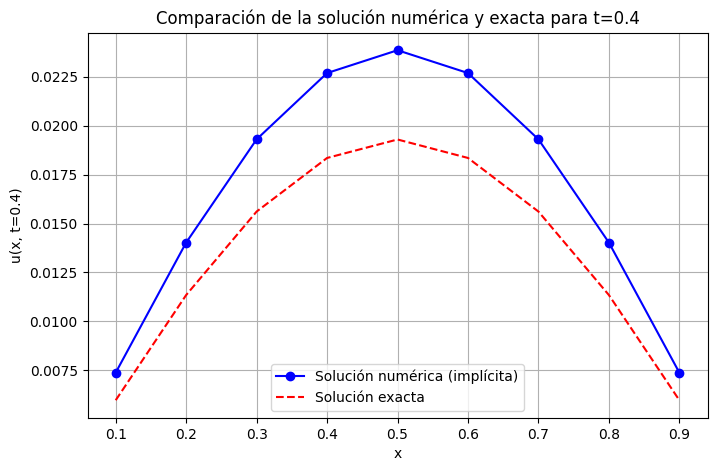

In [103]:
# Parámetros
h = 0.1
k = 0.01
alpha = 1.0
r = alpha**2 * k / h**2  # r = 1
t_final = 0.4
n_steps = int(t_final / k)

# Puntos espaciales interiores (x de 0.1 a 0.9)
x = np.linspace(0.1, 0.9, 9)

# Condición inicial
u0 = np.sin(np.pi * x)

# Matriz A (9x9) para el método implícito
n = len(x)
A_1 = np.diag(3 * np.ones(n)) + np.diag(-1 * np.ones(n-1), 1) + np.diag(-1 * np.ones(n-1), -1)

# Solución numérica: avanzar en el tiempo
u_num = u0.copy()
for _ in range(n_steps):
    u_num = np.linalg.solve(A_1, u_num)

# Solución exacta en t = 0.4
u_exact = np.sin(np.pi * x) * np.exp(-np.pi**2 * t_final)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, u_num, 'bo-', label='Solución numérica (implícita)')
plt.plot(x, u_exact, 'r--', label='Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x, t=0.4)')
plt.title('Comparación de la solución numérica y exacta para t=0.4')
plt.legend()
plt.grid(True)
plt.show()


##<font color = purple>Ejercicio 4:

##*¿Es* necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No es necesario resolver el sistema 9x9 ya quue es simetrico y
Sí, es posible simplificar significativamente el trabajo con la matriz debido a su estructura simétrica y tridiagonal, e incluso evitar completamente la resolución del sistema para este problema específico.

Simetria: La matriz cumple que $A = A^T$, es decir, los elementos fuera de la diagonal son simétricos $a_{i,j} = a_{j,i} $ .Esto significa que no necesitas almacenar o manipular toda la matriz; basta con conocer la diagonal principal y una de las subdiagonales.

Almacenamiento reducido: En lugar de trabajar con los 81 elementos de la matriz 9×9, solo necesitas recordar:

La diagonal principal: todos los elementos son 3.

La subdiagonal: todos los elementos son -1.

El tamaño n=9

¿Por qué funciona esto?

La matriz $A$ surge de discretizar la ecuación de calor usando diferencias finitas implícitas. Para la condición inicial $sin(πx)$, la solución mantiene la misma forma espacial y solo decae exponencialmente en el tiempo. La solución analítica captura este comportamiento exactamente. La simetría de la matriz refleja la simetría física del problema

In [104]:
j = 20

In [105]:
U = richardson(A, b, j)


##<font color = purple>Ejercicio 6:

##Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?



In [106]:
x = np.linspace(0.1, 0.9, 9) #np.linspace() Crea un array de números equiespaciados en un intervalo:
y = np.linspace(0, 0.6, j+1)
X,Y = np.meshgrid(x, y) #np.meshgrid() Crea matrices de coordenadas a partir de vectores 1D

Creamos una visualización gráfica de una solución numérica para un problema de Dirichlet usando un mapa de colores para visualizar el maximo y el minimo de la solución

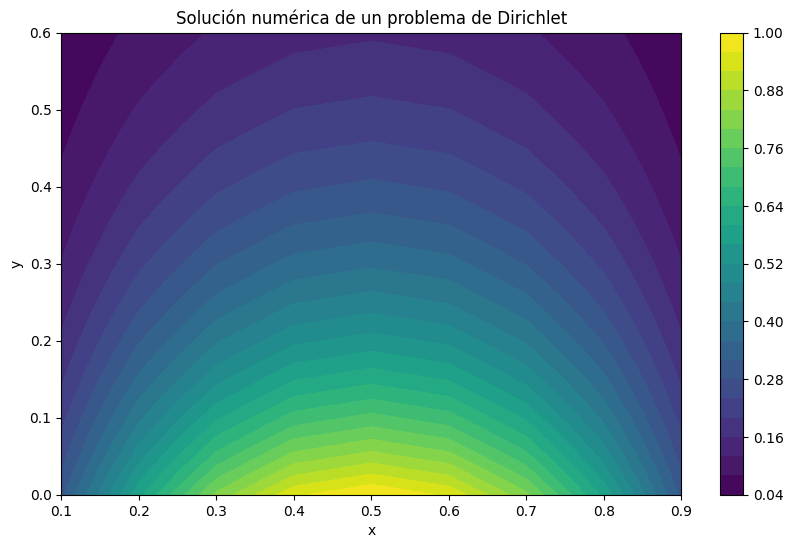

In [107]:
# Mapa de colores
plt.figure(figsize=(10, 6)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis) #Crea un mapa de contornos relleno (filled contours):
                                                            #X, Y: Coordenadas de la malla
                                                            #U: Valores de la función en cada punto
                                                            #levels: Número de niveles de contorno
                                                            #cmap: Esquema de colores
plt.colorbar(contour) #Añade una barra de colores que muestra la escala:
plt.title('Solución numérica de un problema de Dirichlet') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('y') #Etiquetan los ejes
plt.axis('auto') #Configura los límites de los ejes automáticamente
plt.show() #Muestra el gráfico en pantalla

##<font color = purple>Explicación de la gráfica

Esta gráfica muestra la solución numérica de un problema de Dirichlet en un dominio bidimensional, representando cómo varía la solución $U(x,y)$ en el espacio.

##<font color = red> 1.-Distribución Espacial

*  Regiones azules: Valores mínimos de la solución $U(x,y)$
*  Regiones amarillas: Valores máximos de la solución $U(x,y)$
*  Transición suave entre colores indica una solución continua
##<font color = red> 2.Patrón de la Solución

*  Muestra cómo varía U a lo largo del dominio (x,y)
*  Las líneas de contorno conectan puntos con el mismo valor de U
*  La densidad de líneas indica la magnitud del gradiente

##<font color = red> 3.Características del Problema de Dirichlet

*  Los valores en los bordes están fijos (condiciones de Dirichlet)
*  El interior muestra cómo se propaga la solución desde los bordes
*  La simetría o asimetría revela propiedades del operador diferencial


##<font color = red> 4.Interpretación para la Ecuación de Calor
#Si esto representa la ecuación de calor en la gráfica:

*  Amarillo: Zonas de mayor temperatura
*  Azul: Zonas de menor temperatura
*  El patrón muestra cómo se distribuye/difunde el calor en el dominio

















Creamos una visualización gráfica en 3D de una solución numérica para un problema de Dirichlet usando un mapa de colores para visualizar el maximo y el minimo de la solución

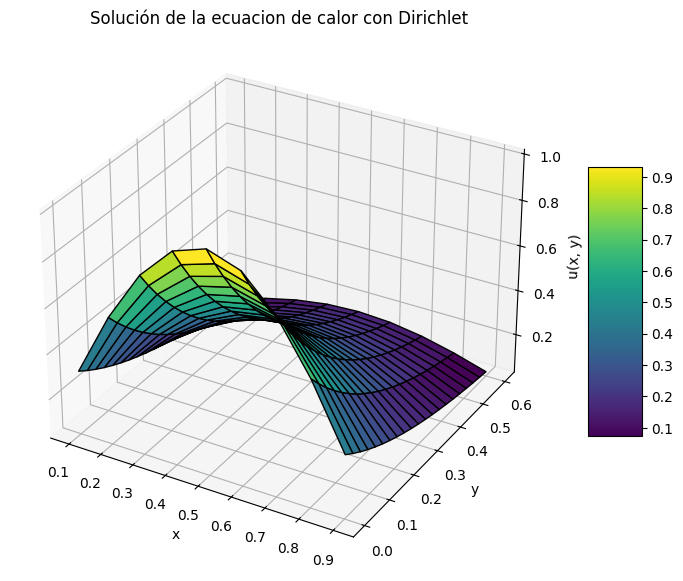

In [108]:
fig = plt.figure(figsize=(10, 7)) #Crea una nueva figura para el gráfico
                                  # figsize: (ancho, alto)
ax = fig.add_subplot(111, projection='3d') #Crea un sistema de ejes 3D dentro de una figura
                                           # (111)Notación de MATLAB para "1 fila, 1 columna, subplot 1"
                                           # projection='3d'Especifica que queremos ejes tridimensionales
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k') #Dibuja una superficie 3D
                                                                #X, Y, U: Coordenadas y valores de la superficie
                                                                #cmap: Mapa de colores para visualizar los valores
                                                                #edgecolor: Color de las líneas de la malla ('k' = negro, 'none' = sin líneas)
ax.set_title('Solución de la ecuacion de calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5) #Añade una barra de colores para la superficie
                                         #surf: La superficie a la que se referencia la barra
                                         #shrink: Factor de escala del tamaño (0.0-1.0)
                                         #aspect: Relación de aspecto (ancho/alto)
plt.show() #Muestra el gráfico en pantalla

##<font color = purple>Explicación de la gráfica

La gráfica muestra una superficie tridimensional que representa la solución de la ecuación de calor con condiciones de Dirichlet.

##<font color = purple>1.-Estructura de la Superficie
Eje X: Coordenada espacial x

Eje Y: Coordenada espacial y (o posiblemente tiempo t)

Eje Z: Valor de la solución u(x,y)

Malla de superficie: Muestra la variación de U en el dominio

##<font color = purple>2. Características Visuales
Colores: Escala "viridis" (azul → verde → amarillo) indica valores de menor a mayor

Bordes negros: edgecolor='k' resalta las líneas de la malla

Barra de color: Proporciona referencia numérica para los valores de U

##<font color = purple>3. Interpretación para la Ecuación de Calor
Picos/Alturas: Representan zonas de mayor temperatura o concentración

Valles/Depresiones: Zonas de menor temperatura

Pendientes suaves: Indican difusión uniforme del calor

Pendientes pronunciadas: Sugieren gradientes térmicos fuertes

##<font color = Red>Ventaja de la Gráfica 3D sobre Gráficas 2D
Esta visualización 3D permite:

Comprender mejor la forma tridimensional de la solución

Identificar patrones que podrían pasar desapercibidos en 2D

Evaluar cualitativamente la precisión del método numérico

La superficie muestra una solución suave y continua, típica de problemas de calor bien planteados con condiciones de Dirichlet.